# An attempt to draw some fractals

## Description & imports

In [ ]:
#Fractals are cool geometric figures typically exhibiting self-similarity, i.e. looking the same at numerous scales
#There are several ways to construct such objects and here we explore a few of them.
#As a starting point, we try to reproduce the calculations here: https://realpython.com/mandelbrot-set-python/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from dataclasses import dataclass
from math import log
#from viewport import Viewport

ModuleNotFoundError: No module named 'viewport'

## Simple functions via NumPy 

In [84]:
# First basic function

def z(n, c):
    if n == 0:
        return 0
    else:
        return z(n-1, c) ** 2 + c

In [85]:
#An example

for n in range(10):
    print(f"z({n}) = {z(n, c = 0.325)}")

z(0) = 0
z(1) = 0.325
z(2) = 0.43062500000000004
z(3) = 0.510437890625
z(4) = 0.5855468401856995
z(5) = 0.6678651020514571
z(6) = 0.7710437945382032
z(7) = 0.9195085330958708
z(8) = 1.17049594243612
z(9) = 1.695060751259421


In [16]:
# Same function but with a while loop

def sequence(c):
    z = 0
    while True:
        yield z
        z = z ** 2 + c

In [19]:
# Using the above

for n, z in enumerate(sequence(c = 0)):
    print(f"z({n}) = {z}")
    if n >= 9:
        break

z(0) = 0
z(1) = 0
z(2) = 0
z(3) = 0
z(4) = 0
z(5) = 0
z(6) = 0
z(7) = 0
z(8) = 0
z(9) = 0


In [23]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [27]:
a = complex_matrix(0, 1, 0, 1, 10)

In [32]:
def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= 2

In [37]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


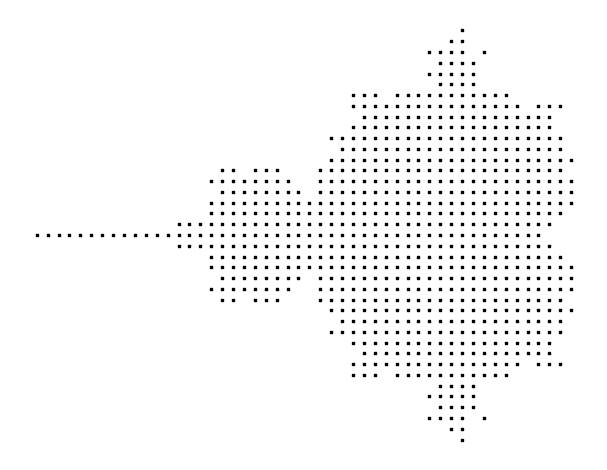

In [40]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density = 21)
members = get_members(c, num_iterations=20)

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


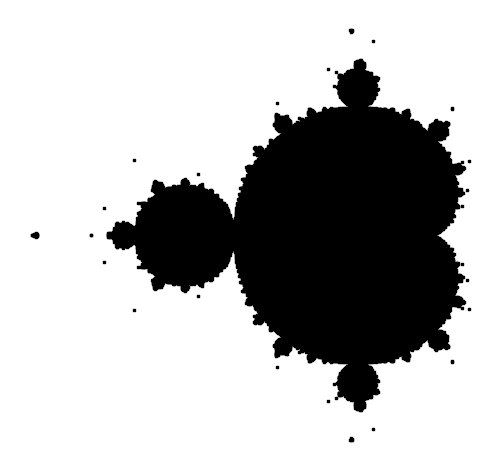

In [46]:
#Same as above but experimenting with different pixel densities and number of iterations.

c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density = 210)
members = get_members(c, num_iterations=2000)

plt.scatter(members.real, members.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


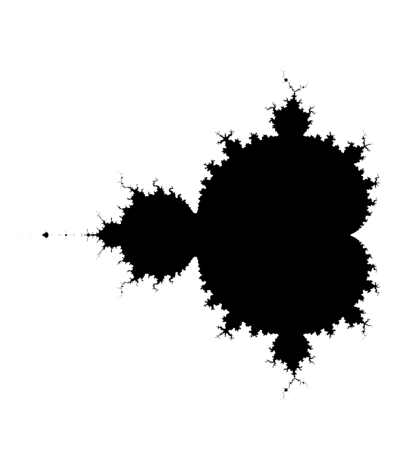

In [47]:
#A slightly more sophisticated approach to the same thing

c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


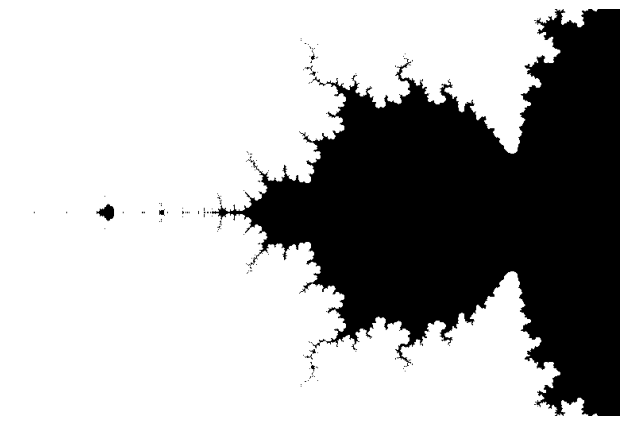

In [50]:
#A slightly different zoom of the same thing

c = complex_matrix(-2, -0.5, -0.5, 0.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [53]:
#Producing similar images using Pillow instead

c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
image = Image.fromarray(~is_stable(c, num_iterations=20))
image.show()

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_42456\332138429.py:4: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


In [56]:
#Similar but using the internal functionality of pillow

Image.effect_mandelbrot((1024, 1024), (-3, -2.5, 2, 2.5), 200).show()

## More direct approach without NumPy

In [59]:
#More hands-on from this point onwards. Function that operates on individual numbers without vectorizing in NumPy

def is_stable(c, max_iterations):
    z = 0
    for _ in range(max_iterations):
        z = z ** 2 + c
        if abs(z) > 2:
            return False
    return True

In [61]:
# An example

is_stable(0.26, max_iterations=20)

True

In [62]:
#Another example

is_stable(0.26, max_iterations=30)

False

In [64]:
# A more OOP-esq approach

@dataclass
class MandelbrotSet:
    max_iterations: int

    def __contains__(self, c: complex) -> bool:
        z = 0
        for _ in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return False
        return True

In [75]:
# using the above to produce and image

#from mandelbrot import MandelbrotSet
mandelbrot_set = MandelbrotSet(max_iterations=20)

width, height = 512 * 2, 512 * 2
scale = 0.0075 / 2
BLACK_AND_WHITE = "1"

image = Image.new(mode=BLACK_AND_WHITE, size=(width, height))
for y in range(height):
    for x in range(width):
        c = scale * complex(x - width / 2, height / 2 - y)
        image.putpixel((x, y), c not in mandelbrot_set)

image.show()

In [78]:
# Modifying the OOP approach to have amore refined approach to the escape count

@dataclass
class MandelbrotSet:
    max_iterations: int
        
    def __contains__(self, c: complex) -> bool:
        return self.stability(c) == 1
        
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations

    def escape_count(self, c: complex) -> int:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return iteration
        return self.max_iterations

In [79]:
#Example of the above

mandelbrot_set = MandelbrotSet(max_iterations=30)

mandelbrot_set.escape_count(0.25)

mandelbrot_set.stability(0.25)

0.25 in mandelbrot_set

True

In [80]:
#Further example of the above

mandelbrot_set.escape_count(0.26)

mandelbrot_set.stability(0.26)

0.26 in mandelbrot_set

False

In [82]:
# Similar to earlier OOP but with grayscale

mandelbrot_set = MandelbrotSet(max_iterations=20)

width, height = 512 * 2, 512 * 2
scale = 0.0075 / 2
GRAYSCALE = "L"

image = Image.new(mode=GRAYSCALE, size=(width, height))
for y in range(height):
    for x in range(width):
        c = scale * complex(x - width / 2, height / 2 - y)
        instability = 1 - mandelbrot_set.stability(c)
        image.putpixel((x, y), int(instability * 255))

image.show()

## Smoothing out the exterior

In [86]:
#Starting to get colours involved

# mandelbrot.py


@dataclass
class MandelbrotSet:
    max_iterations: int
    escape_radius: float = 2.0

    def __contains__(self, c: complex) -> bool:
        return self.stability(c) == 1

    def stability(self, c: complex, smooth=False) -> float:
        return self.escape_count(c, smooth) / self.max_iterations

    def escape_count(self, c: complex, smooth=False) -> int | float:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > self.escape_radius:
                if smooth:
                    return iteration + 1 - log(log(abs(z))) / log(2)
                return iteration
        return self.max_iterations

In [89]:
# Example of the above

mandelbrot_set = MandelbrotSet(max_iterations=30)

mandelbrot_set.stability(-1.2039 - 0.1996j, smooth=True)

1.014794475165942

In [90]:
# Another example

mandelbrot_set.stability(42, smooth=True)

-0.030071301713066417

In [91]:
# Taking care of some rounding issues

@dataclass
class MandelbrotSet:
    max_iterations: int
    escape_radius: float = 2.0

    def __contains__(self, c: complex) -> bool:
        return self.stability(c) == 1

    def stability(self, c: complex, smooth=False, clamp=True) -> float:
        value = self.escape_count(c, smooth) / self.max_iterations
        return max(0.0, min(value, 1.0)) if clamp else value

    def escape_count(self, c: complex, smooth=False) -> int | float:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > self.escape_radius:
                if smooth:
                    return iteration + 1 - log(log(abs(z))) / log(2)
                return iteration
        return self.max_iterations

In [93]:
# Plotting the image with the above

width, height = 512 * 2, 512 * 2
scale = 0.0075 / 2
GRAYSCALE = "L"

image = Image.new(mode=GRAYSCALE, size=(width, height))
for y in range(height):
    for x in range(width):
        c = scale * complex(x - width / 2, height / 2 - y)
        instability = 1 - mandelbrot_set.stability(c, smooth=True)
        image.putpixel((x, y), int(instability * 255))

image.show()